# Introduction to Coil Sets, Devices, and Fields

#### The purpose of this tutorial is to develop familiarity with the fundamental objects we will need to create, manipulate, and analyze magnetic configurations.

#### The four objectives of this tutorial are enumerated below:
1. Create coil sets and transform them through translations and rotations.
2. Create suitable meshes and use them to create Green's functions for flux and magnetic field components
3. Learn how to combine sets of coils into a Device object
3. Understand and plot the results of goals 1, 2, and 3

Just like any other python notebook we start with importing standard libraries as well as our project's specific functionality

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from pleiades import RectangularCoil

Now we will create an instance of the `RectangularCoil` class as it is by far the most common coil set used for building electromagnets for plasma physics or fusion experiments. We create a `RectangularCoil` by specifying at a minimum the centroid `(r0, z0)` of the regular array of current filaments in cylindrical coordinates and with SI units.

In [2]:
rc1 = RectangularCoil(1, .5, nr=10, nz=10, dr=.01, dz=.01)
print(rc1)

CurrentFilamentSet
          Class:  <class 'pleiades.current_sets.RectangularCoil'>
        Current:  1.000000e+00 amps
    N Filaments:  100
  Total Current:  1.000000e+02 amps
        R, Z, W:  [9.550000e-01, 4.550000e-01, 1.000000e+00]
                  [9.550000e-01, 4.650000e-01, 1.000000e+00]
                  [9.550000e-01, 4.750000e-01, 1.000000e+00]
                  [9.550000e-01, 4.850000e-01, 1.000000e+00]
                  [9.550000e-01, 4.950000e-01, 1.000000e+00]
                  [9.550000e-01, 5.050000e-01, 1.000000e+00]
                  [9.550000e-01, 5.150000e-01, 1.000000e+00]
                  [9.550000e-01, 5.250000e-01, 1.000000e+00]
                  [9.550000e-01, 5.350000e-01, 1.000000e+00]
                  [9.550000e-01, 5.450000e-01, 1.000000e+00]
                  [9.650000e-01, 4.550000e-01, 1.000000e+00]
                  [9.650000e-01, 4.650000e-01, 1.000000e+00]
                  [9.650000e-01, 4.750000e-01, 1.000000e+00]
                  [9.650000e

We can learn the basic properties of a coil set just by printing it, but to see what other attributes it has let's print some of those as well.

In [4]:
print(f'Centroid: {rc1.centroid}, Units: m')
print(f'Cross-sectional area: {rc1.area}, Units: m$^2$')
print(f'Current per filament: {rc1.current}, Units: A')
print(f'Total current: {rc1.total_current}, Units: A')
print(f'Current density: {rc1.current_density}, Units: A/m$^2$')

Centroid: [1.  0.5], Units: m
Cross-sectional area: 0.01, Units: m$^2$
Current per filament: 1.0, Units: A
Total current: 100.0, Units: A
Current density: 10000.0, Units: A/m$^2$


Now we will try our hand at plotting some of this data as well as the visulaizations. to access the fields like psi, B_R, and B_Z we simply call their attributes from the brb object as shown below.

In [5]:
from pleiades import RectMesh

mesh = RectMesh(rmin=0, rmax=3, zmin=0, zmax=3)
rc1.mesh = mesh
rc1.psi()

array([0.00000000e+00, 2.02281630e-08, 8.09125551e-08, ...,
       4.59174341e-06, 4.60797399e-06, 4.62333460e-06])

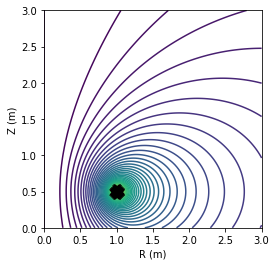

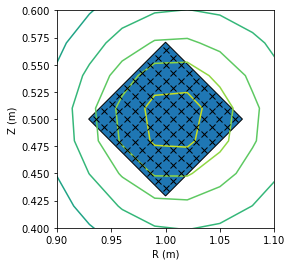

In [5]:
fig, ax = plt.subplots()
rc1.plot(ax, color='k')
ax.contour(mesh.R, mesh.Z, rc1.psi().reshape(mesh.R.shape), 51)
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_aspect(1)
ax.set_xlabel('R (m)')
ax.set_ylabel('Z (m)')
plt.show()
fig, ax = plt.subplots()
rc1.plot(ax, color='k')
ax.contour(mesh.R, mesh.Z, rc1.psi().reshape(mesh.R.shape), 11)
ax.set_xlim(.9, 1.1)
ax.set_ylim(.4, .6)
ax.set_aspect(1)
ax.set_xlabel('R (m)')
ax.set_ylabel('Z (m)')
plt.show()